### In this assignment you will focus on structuring data using regular expressions, and using regular expressions to clean real text data, analysing the resulting dataset, and plot the associated frequency distributions of words in the dataset.

### In terms of the Data Science Pipeline, you will mainly be focusing on data cleaning and explorative data analysis.

# Part 1: Regular expression warmup

### In these questions, you are expected to use functionality from the Python regular expression module: re.

## 1.a

### Danish CPR numbers consist of a six-digit date (DDMMYY), followed by a 4 digit identifier (IIII). Using the re module, the task is to write and apply a regular expression that matches any CPR number, either in the DDMMYYIIII format, or in the DDMMYY-IIII format. The regular expression should contain four groups, such that the DD, MM, YY, and IIII parts can be extracted after matching.

First I will be creating some example CPR-numbers.

I will then be using the method that we first used in week 1 on thursday for grouping.

In [3]:
import re

cprNumbers = '''1703055080
170305-5080
1812993719
181299-3719
280866-3927
0403688888''' 

pattern = re.compile(r'([0-9]{2})([0-9]{2})([0-9]{2})[ -]?([0-9]{4})')

for cprNumber in cprNumbers.split('\n'):
    match = pattern.search(cprNumber)
    if match:
        print(match.group())
        print(f"group 1: {match.group(1)}")
        print(f"group 2: {match.group(2)}")
        print(f"group 3: {match.group(3)}")
        print(f"group 4: {match.group(4)}")

1703055080
group 1: 17
group 2: 03
group 3: 05
group 4: 5080
170305-5080
group 1: 17
group 2: 03
group 3: 05
group 4: 5080
1812993719
group 1: 18
group 2: 12
group 3: 99
group 4: 3719
181299-3719
group 1: 18
group 2: 12
group 3: 99
group 4: 3719
280866-3927
group 1: 28
group 2: 08
group 3: 66
group 4: 3927
0403688888
group 1: 04
group 2: 03
group 3: 68
group 4: 8888


## 1.b

### The 4-digit identifier together with the last two digits of the date (i.e. the year), encodes in which century a person is born, using the following system

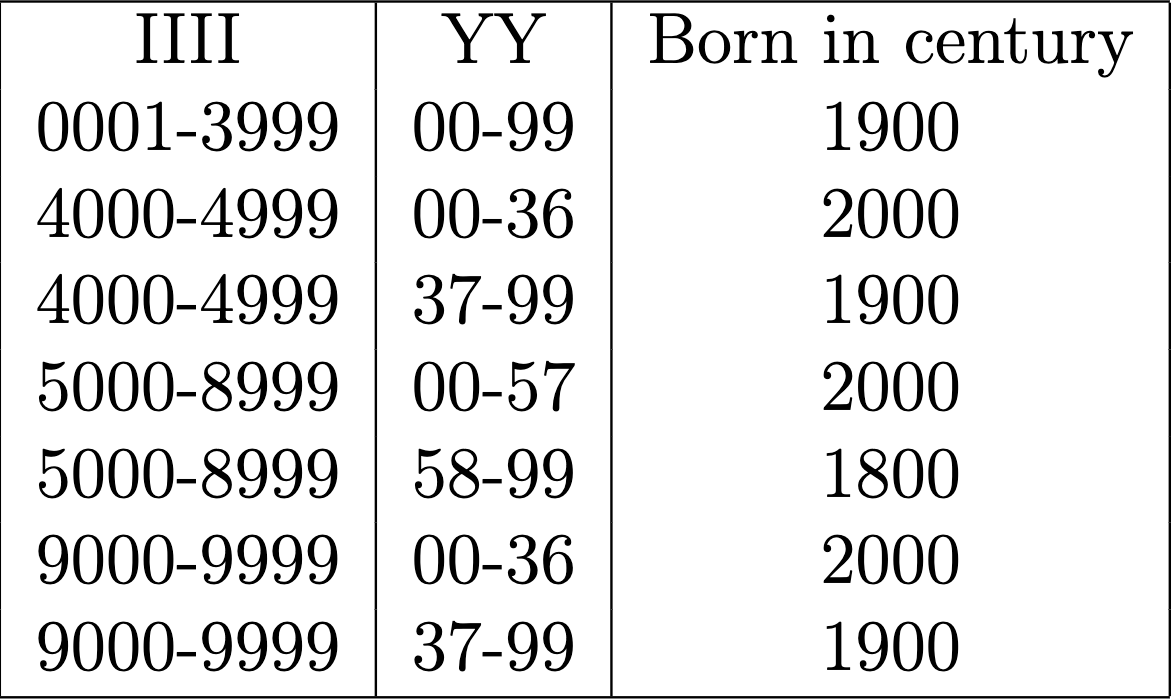

### Note that in this table, both numbers in a range are included (e.g. 00-99 includes both 00 and 99).

### Write a function that returns the relevant century based on the information in the table above, and returns either 1800, 1900 or 2000 (as an integer).

This is pretty boring. I will just be writing some 'if' statements and running the same example CPR-numbers on them by using the regex grouping method just like before.

In [4]:
cprNumbers = '''1703055080
170305-5080
1812993719
181299-3719
280866-3927
0403688888''' 

def getCentury(cprNumber):
    pattern = re.compile(r'([0-9]{2})([0-9]{2})([0-9]{2})[ -]?([0-9]{4})')
    match = pattern.search(cprNumber)
    if match:
        id = int(match.group(4))
        birthYear = int(match.group(3))
        if id <= 3999:
            return 1900
        elif (id >= 4000) and (id <= 4999):
            if birthYear <= 36:
                return 2000
            else:
                return 1900
        elif (id >= 5000) and (id <= 8999):
            if birthYear <= 57:
                return 2000
            else:
                return 1800
        elif (id >= 9000) and (id <= 9999):
            if birthYear <= 36:
                return 2000
            else:
                return 1900
        else:
            return 'Could not find century'
    return 'Incorrect CPR number'

for cprNumber in cprNumbers.split('\n'):
    print(f"CPR-Number: {cprNumber} belongs to century: {getCentury(cprNumber)}")


CPR-Number: 1703055080 belongs to century: 2000
CPR-Number: 170305-5080 belongs to century: 2000
CPR-Number: 1812993719 belongs to century: 1900
CPR-Number: 181299-3719 belongs to century: 1900
CPR-Number: 280866-3927 belongs to century: 1900
CPR-Number: 0403688888 belongs to century: 1800


# Part 2: Processing the FakeNewsCorpus data set

### This part focuses on getting the FakeNewsCorpus dataset in a reasonable shape, and doing some initial exploration of the data. You will be working on a sample of the FakeNewsCorpus.

## 2.a

### Download the CSV onto your computer

## 2.b

### Read the CSV file into memory

I choose to use pandas to handle the data.

In [5]:
import pandas as pd

newsData = pd.read_csv('news_sample.csv')
newsData['content'].head(5)

0    Sometimes the power of Christmas will make you...
1    AWAKENING OF 12 STRANDS of DNA – “Reconnecting...
2    Never Hike Alone: A Friday the 13th Fan Film U...
3    When a rare shark was caught, scientists were ...
4    Donald Trump has the unnerving ability to abil...
Name: content, dtype: object

## 2.c

### Manually inspect the data to get an idea of potential problems of the data structure and representation that need to be fixed.

The data is not very human-friendly (hard to find specific information and understand the structure)

I also find it problematic that the 'content' covers multiple lines. Not sure it this actually is a problem when loading the data to train a model, but it would at least look way cleaner if each datapoint was using just one row in the csv-file.

## 2.d

### Clean the data. First, you’ll try to do this manually, by writing our own cleanText() function that uses regular expressions. The function should take raw text as input and return a version of the text with the following modifications:

* ### all words must be lowercased
* ### it should not contain multiple white spaces, tabs, or new lines
* ### numbers, dates, emails, and URLs should be replaced by "< NUM >", "< DATE >", "< EMAIL >" AND "< URL >", respectively. Note that replacing dates with <DATE> is particularly tricky as dates can be expressed in many forms. You may just choose one or a few common date formats present in the data set and only replace those. (Be careful about tokenizing <> symbols because these are punctuation in most Tokenizers).

We can load our csv-file into a panda and use regex to manipulate and replace certain things like white spaces, URLs and numbers.

I will then display the results with .head() to view the changes to 'content'

In [6]:
def cleanText():
    newsData = pd.read_csv('news_sample.csv')
    newsData['content'] = newsData['content'].str.lower()
    newsData['content'] = newsData['content'].replace(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b', '<DATE>', regex=True)
    newsData['content'] = newsData['content'].replace(r'\b[\w\.-]+?@\w+?\.\w+?\b', '<EMAIL>', regex=True)
    newsData['content'] = newsData['content'].replace(r'http\S+|www\S+', '<URL>', regex=True)
    newsData['content'] = newsData['content'].replace(r'[0-9]+', '<NUM>', regex=True)
    newsData['content'] = newsData['content'].replace(r'\s+', ' ', regex=True)
    return newsData

cleanedNewsData = cleanText()
cleanedNewsData.to_csv('cleaned_news_sample.csv', index=False)
cleanedNewsData['content'].head(5)

0    sometimes the power of christmas will make you...
1    awakening of <NUM> strands of dna – “reconnect...
2    never hike alone: a friday the <NUM>th fan fil...
3    when a rare shark was caught, scientists were ...
4    donald trump has the unnerving ability to abil...
Name: content, dtype: object

We now see how our data has been cleaned. An easy spot is that all letters are now in lower case.

## 2.e

### Now, try to use a library for cleaning the data. The clean-text module provides out-of-the-box functionality for much of the cleaning you did in the previous step (pip install clean-text). Use it to implement the same cleaning steps as in your own cleanText() implementation.

I tried to get as many wanted features out of the library, while including the same tokenization steps as we did just before.

Note that the number replacements gave '< NUMBER >' as default in the clean-text library, so I changed this with 'replace_with_number' to '< NUM >'.

In [7]:
from cleantext import clean

def cleanText():
    newsData = pd.read_csv('news_sample.csv')
    newsData['content'] = newsData['content'].apply(lambda x: clean(
        text=x,
        lower=True,
        no_line_breaks=True,
        normalize_whitespace=True,
        no_urls=True,
        no_numbers=True,
        no_emails=True,
        no_currency_symbols=True,
        no_digits=True,
        no_punct=True,
        replace_with_number = "<NUM>",
        lang='en'
        ))
    return newsData

cleanedNewsData = cleanText()
cleanedNewsData.to_csv('cleaned_news_sample.csv', index=False)
cleanedNewsData['content'].head(5)

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


0    sometimes the power of christmas will make you...
1    awakening of <num> strands of dna reconnecting...
2    never hike alone a friday the 00th fan film us...
3    when a rare shark was caught scientists were l...
4    donald trump has the unnerving ability to abil...
Name: content, dtype: object

We get about the same results as when we did it manually, though I added a few more cleaning steps.

# Part 3: Descriptive frequency analysis of the data

### Now, you will do some simple exploration of the data to understand the effect of preprocessing conducted in Part 2, namely to the vocabulary, and the frequency distribution of the vocabulary across documents.

## 3.a

### Calculate the number of unique words in the data after preprocessing and compare it to the number of unique words before preprocessing (i.e. in the raw data).

We can joint up all the words in the 'content' of the raw and cleaned datasets, and then count the amount of unique words.

In [8]:
from collections import Counter

rawNewsData = pd.read_csv('news_sample.csv')
cleanedNewsData = pd.read_csv('cleaned_news_sample.csv')

combinedRawWords = ' '.join(rawNewsData['content'].tolist())
combinedWordsCleaned = ' '.join(cleanedNewsData['content'].tolist())

rawWords = re.findall(r'\b\w+\b', combinedRawWords)
cleanedWords = re.findall(r'\b\w+\b', combinedWordsCleaned)

uniqueRawWords = Counter(rawWords)
uniqueCleanedWords = Counter(cleanedWords)

print(f"Unique words in raw data: {len(uniqueRawWords)}")
print(f"Unique words in cleaned data: {len(uniqueCleanedWords)}")

Unique words in raw data: 19435
Unique words in cleaned data: 16543


We see that the amount of words fall quite a lot. This will in the future make it easier to train the NLP, since we have to look at less words.

## 3.b

### Calculate how frequently each of these words is used in the dataset. Sort this list, so that the most frequent word appears first, and then use Python’s matplotlib library to plot a barplot where the 50 most frequent words appear on the x-axis, and their frequency appears on the y-axis.

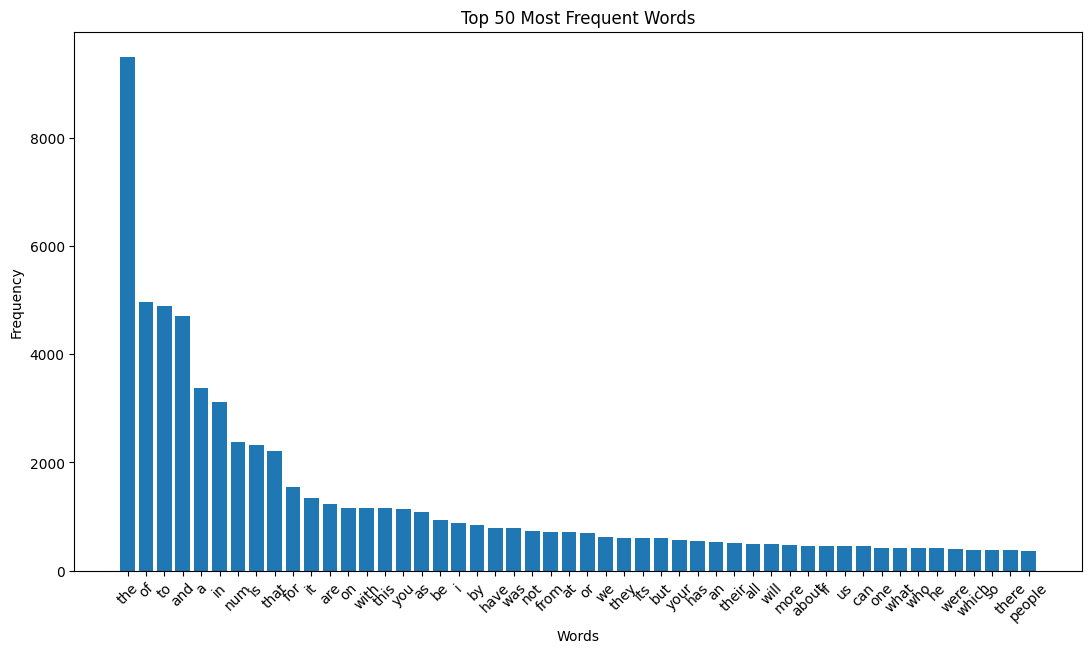

In [15]:
import matplotlib.pyplot as plt

word_freq = Counter(cleanedWords)

most_common_words = word_freq.most_common(50)

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(13, 7))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

We can now see that stopwords like: 'the', 'of', 'to', 'and' ...

matches the distribution of Zipf’s Law in terms of the frequency of occuring words.

At the very end we start to see words that might become important for the understanding of the content like: 'people', so I don't think we want to remove those words, since it might damage the contextual understanding of the content (in the introduction to Zipf's Law we saw that the bottom words aswell as the top words were unimportant for the understanding of the content).